In [1]:
import pandas as pd
import numpy as np
import quandl
quandl.ApiConfig.api_key = 'sf6vPvynG4id8VymJUaH'
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
df = quandl.get("WIKI/NFLX", api_key='sf6vPvynG4id8VymJUaH')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2002-05-23,16.19,17.40,16.04,16.75,7485000.0,0.0,1.0,1.156429,1.242857,1.145714,1.196429,104790000.0
2002-05-24,17.00,17.15,16.76,16.94,793200.0,0.0,1.0,1.214286,1.225000,1.197143,1.210000,11104800.0
2002-05-28,16.99,17.25,16.20,16.20,472100.0,0.0,1.0,1.213571,1.232143,1.157143,1.157143,6609400.0
2002-05-29,16.30,16.30,15.20,15.45,482700.0,0.0,1.0,1.164286,1.164286,1.085714,1.103571,6757800.0
2002-05-30,15.51,15.51,15.00,15.00,725300.0,0.0,1.0,1.107857,1.107857,1.071429,1.071429,10154200.0


In [3]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,316.35,319.40,314.511,316.48,5016980.0,0.0,1.0,316.35,319.40,314.511,316.48,5016980.0
2018-03-22,313.07,314.12,305.660,306.70,7920524.0,0.0,1.0,313.07,314.12,305.660,306.70,7920524.0
2018-03-23,307.41,310.73,300.360,300.94,9226978.0,0.0,1.0,307.41,310.73,300.360,300.94,9226978.0
2018-03-26,309.36,321.03,302.000,320.35,11906279.0,0.0,1.0,309.36,321.03,302.000,320.35,11906279.0
2018-03-27,322.49,322.90,297.000,300.69,11890994.0,0.0,1.0,322.49,322.90,297.000,300.69,11890994.0


In [4]:
df.shape

(3988, 12)

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [6]:
df = df[['Close']]
df.head()

,Close
Date,
2002-05-23,16.75
2002-05-24,16.94
2002-05-28,16.20
2002-05-29,15.45
2002-05-30,15.00


In [8]:
forecast_days = 30

df['Prediction'] = df[['Close']].shift(-forecast_days)
df.tail(forecast_days)

,Close,Prediction
Date,,
2018-02-13,258.27,NaN
2018-02-14,266.00,NaN
2018-02-15,280.27,NaN
2018-02-16,278.52,NaN
2018-02-20,278.55,NaN
2018-02-21,281.04,NaN
2018-02-22,278.14,NaN
2018-02-23,285.93,NaN
2018-02-26,294.16,NaN


In [9]:
#independet var
x  = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast_days]
print(x)

[[ 16.75  ]
 [ 16.94  ]
 [ 16.2   ]
 ...
 [250.0542]
 [249.18  ]
 [257.95  ]]


In [10]:
#dependent var 
y = np.array(df['Prediction'])
y = y[:-forecast_days]
print(y)

[ 16.46  16.25  16.29 ... 300.94 320.35 300.69]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [12]:
tree = DecisionTreeRegressor()
tree.fit(x_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [14]:
tree_score = tree.score(x_test, y_test)
print("Decision Tree Score:", tree_score)

Decision Tree Score: 0.9998727028213841


In [15]:
lr_regressor = LinearRegression()
lr_regressor.fit(x_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lr_score = lr_regressor.score(x_test, y_test)
print("Linear Regression score: ", lr_score)

Linear Regression score:  0.840818161066979


In [17]:
x_forecast = df.drop(['Prediction'], 1)[:-forecast_days]
x_forecast = x_forecast.tail(forecast_days)
x_forecast = np.array(x_forecast)
x_forecast


array([[191.96  ],
       [201.07  ],
       [205.05  ],
       [205.63  ],
       [209.99  ],
       [212.05  ],
       [209.31  ],
       [212.52  ],
       [217.24  ],
       [221.23  ],
       [221.53  ],
       [217.5   ],
       [220.33  ],
       [220.46  ],
       [227.58  ],
       [250.29  ],
       [261.279 ],
       [269.74  ],
       [274.6   ],
       [284.59  ],
       [278.8   ],
       [270.3   ],
       [265.07  ],
       [267.43  ],
       [255.59  ],
       [265.72  ],
       [264.56  ],
       [250.0542],
       [249.18  ],
       [257.95  ]])

In [19]:
tree_pr = tree.predict(x_forecast)
tree_pr

array([258.27 , 187.58 , 280.27 , 113.25 , 204.541, 285.93 , 204.541,
       285.93 , 223.46 , 261.81 , 261.81 , 223.46 , 212.84 , 212.84 ,
       247.6  , 321.16 , 313.51 , 331.44 , 233.27 , 315.88 , 218.77 ,
       331.44 , 210.05 , 203.97 , 317.5  , 210.05 , 210.05 , 321.16 ,
       305.65 , 266.62 ])

In [20]:
lr_pr = lr_regressor.predict(x_forecast)
lr_pr

array([187.93443105, 196.35295539, 200.03086174, 200.56683805,
       204.59590129, 206.49954126, 203.96751528, 206.93386688,
       211.29560507, 214.98275239, 215.25998152, 211.53587031,
       214.15106503, 214.27119765, 220.85076881, 241.83701335,
       251.99191609, 259.81070143, 264.30181321, 273.53354298,
       268.18302092, 260.3281958 , 255.4951681 , 257.67603719,
       246.73472784, 256.0958312 , 255.02387859, 241.61911126,
       240.8112656 , 248.91559694])

C:\Users\WINDOWS_10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


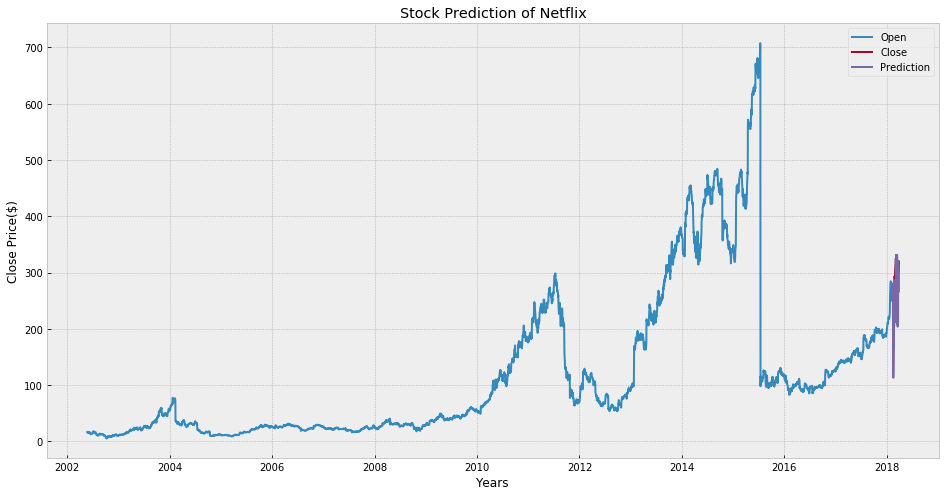

In [26]:
prediction = tree_pr

final = df[x.shape[0]:]
final['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(final[['Close', 'Prediction']])
plt.title('Stock Prediction of Netflix')
plt.xlabel('Years')
plt.ylabel('Close Price($)')
plt.legend(['Open', 'Close', 'Prediction'])
plt.show()